# Visualizing Female School Dropout Rates: Unveiling Educational Disparities

The project aims to understand the reasons behind the high dropout rate of girls from school. By analyzing the comprehensive dataset provided by [UNICEF](https://data.unicef.org/topic/gender/gender-disparities-in-education/) and using various visualization techniques, we will explore the number of school dropouts at different educational levels. Our goal is to identify the root causes and challenges that hinder girls' educational progress. With these insights, we will provide actionable recommendations to empower women and prevent further dropout rates. By leveraging data-driven visualizations, we strive to create a transformative impact and break the cycle of educational disadvantage for girls.


In [3]:
# importing the libraries 

import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# Reading the dataset 

school_data = pd.read_csv("School-completion-rates-Nov2019.csv")
school_data

,Unnamed: 0,"Indicator name: Completion rate, primary",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,Gender,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ISO_Code,Country,Region,Sub-region,Least developed countries (LDC),Africa sub-regions,Africa region,Total,Male,Female,...,Fourth,Richest,Source,"Total Population, one year before primary",NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,SA,NaN,LDC,NaN,NaN,54,67,40,...,60,75,DHS 2015,"6,170,913",3160379.0,3010534.0,1.606042e+06,4.564871e+06,26.026,73.974
3,ALB,Albania,ECA,EECA,NaN,NaN,NaN,92,91,93,...,92,98,DHS 2017-18,"156,833",81809.0,75024.0,9.741211e+04,5.942089e+04,62.112,37.888
4,DZA,Algeria,MENA,NaN,NaN,Northern Africa,All,94,93,94,...,96,99,MICS 2012-13,"4,040,275",2060745.0,1979530.0,2.979016e+06,1.061259e+06,73.733,26.267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,NaN,African sub-region - North Africa,NaN,NaN,NaN,Northern Africa,NaN,91,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,NaN,African sub-region - South Africa,NaN,NaN,NaN,Southern Africa,NaN,67,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,NaN,African sub-region - West Africa,NaN,NaN,NaN,Western Africa,NaN,65,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,NaN,Africa region - All,NaN,NaN,NaN,NaN,All,66,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### When displaying the dataset, we noticed the presence of two rows: the "Unnamed" row and the row containing NaN values.

We need to remove both rows.

In [5]:
#Set the first (notna/ unnamed) row as header

school_data.columns = school_data.iloc[0]

In [6]:
#Remove that unamed row from the dataset 

school_data = school_data.iloc[1:,].reindex()

In [7]:
school_data.head()

,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,Gender,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ISO_Code,Country,Region,Sub-region,Least developed countries (LDC),Africa sub-regions,Africa region,Total,Male,Female,...,Fourth,Richest,Source,"Total Population, one year before primary",NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,SA,NaN,LDC,NaN,NaN,54,67,40,...,60,75,DHS 2015,"6,170,913",3160379.0,3010534.0,1.606042e+06,4.564871e+06,26.026,73.974
3,ALB,Albania,ECA,EECA,NaN,NaN,NaN,92,91,93,...,92,98,DHS 2017-18,"156,833",81809.0,75024.0,9.741211e+04,5.942089e+04,62.112,37.888
4,DZA,Algeria,MENA,NaN,NaN,Northern Africa,All,94,93,94,...,96,99,MICS 2012-13,"4,040,275",2060745.0,1979530.0,2.979016e+06,1.061259e+06,73.733,26.267
5,AND,Andorra,ECA,WE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.916,12.084


In [8]:
'''
still another first (notna) row as header and 
we had to do the same as we did for the unamed row to 
have a more presentable dataset

'''

school_data.columns = school_data.iloc[0]
school_data = school_data.iloc[1:,].reindex()
school_data.head()

1,ISO_Code,Country,Region,Sub-region,Least developed countries (LDC),Africa sub-regions,Africa region,Total,Male,Female,...,Fourth,Richest,Source,"Total Population, one year before primary",NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,SA,NaN,LDC,NaN,NaN,54,67,40,...,60,75,DHS 2015,"6,170,913",3160379.0,3010534.0,1.606042e+06,4.564871e+06,26.026,73.974
3,ALB,Albania,ECA,EECA,NaN,NaN,NaN,92,91,93,...,92,98,DHS 2017-18,"156,833",81809.0,75024.0,9.741211e+04,5.942089e+04,62.112,37.888
4,DZA,Algeria,MENA,NaN,NaN,Northern Africa,All,94,93,94,...,96,99,MICS 2012-13,"4,040,275",2060745.0,1979530.0,2.979016e+06,1.061259e+06,73.733,26.267
5,AND,Andorra,ECA,WE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.916,12.084
6,AGO,Angola,SSA,ESA,LDC,Southern Africa,All,51,53,49,...,68,82,DHS 2015-16,"5,482,624",2722689.0,2759935.0,3.663763e+06,1.818861e+06,66.825,33.175


In [9]:
'''
an overview of the dataset, 
including information about the columns, data types, and non-null values.
'''

school_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 2 to 226
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ISO_Code                                     203 non-null    object 
 1   Country                                      222 non-null    object 
 2   Region                                       189 non-null    object 
 3   Sub-region                                   100 non-null    object 
 4   Least developed countries (LDC)              41 non-null     object 
 5   Africa sub-regions                           59 non-null     object 
 6   Africa region                                55 non-null     object 
 7   Total                                        118 non-null    object 
 8   Male                                         99 non-null     object 
 9   Female                                       99 non-null     object 
 10  Ur

In [10]:
school_data

1,ISO_Code,Country,Region,Sub-region,Least developed countries (LDC),Africa sub-regions,Africa region,Total,Male,Female,...,Fourth,Richest,Source,"Total Population, one year before primary",NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,SA,NaN,LDC,NaN,NaN,54,67,40,...,60,75,DHS 2015,"6,170,913",3160379.0,3010534.0,1.606042e+06,4.564871e+06,26.026,73.974
3,ALB,Albania,ECA,EECA,NaN,NaN,NaN,92,91,93,...,92,98,DHS 2017-18,"156,833",81809.0,75024.0,9.741211e+04,5.942089e+04,62.112,37.888
4,DZA,Algeria,MENA,NaN,NaN,Northern Africa,All,94,93,94,...,96,99,MICS 2012-13,"4,040,275",2060745.0,1979530.0,2.979016e+06,1.061259e+06,73.733,26.267
5,AND,Andorra,ECA,WE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.916,12.084
6,AGO,Angola,SSA,ESA,LDC,Southern Africa,All,51,53,49,...,68,82,DHS 2015-16,"5,482,624",2722689.0,2759935.0,3.663763e+06,1.818861e+06,66.825,33.175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,NaN,African sub-region - North Africa,NaN,NaN,NaN,Northern Africa,NaN,91,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,NaN,African sub-region - South Africa,NaN,NaN,NaN,Southern Africa,NaN,67,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,NaN,African sub-region - West Africa,NaN,NaN,NaN,Western Africa,NaN,65,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,NaN,Africa region - All,NaN,NaN,NaN,NaN,All,66,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To improve **readability and adhere to better formatting practices, we decided to rename the columns in the dataset**. This step was necessary as some columns had excessively long names and did not follow recommended formatting conventions.

In [11]:
# Renaming the columns 

school_data.rename(
    columns={"Least developed countries (LDC)": "LDC", 
             "Africa sub-regions": "Africa-sub-regions", 
             "Africa region": "Africa-region",
             "Total Population, one year before primary":"Total-Population"},
    inplace=True,
)

school_data

1,ISO_Code,Country,Region,Sub-region,LDC,Africa-sub-regions,Africa-region,Total,Male,Female,...,Fourth,Richest,Source,"Total Population, one year before primary",NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,SA,NaN,LDC,NaN,NaN,54,67,40,...,60,75,DHS 2015,"6,170,913",3160379.0,3010534.0,1.606042e+06,4.564871e+06,26.026,73.974
3,ALB,Albania,ECA,EECA,NaN,NaN,NaN,92,91,93,...,92,98,DHS 2017-18,"156,833",81809.0,75024.0,9.741211e+04,5.942089e+04,62.112,37.888
4,DZA,Algeria,MENA,NaN,NaN,Northern Africa,All,94,93,94,...,96,99,MICS 2012-13,"4,040,275",2060745.0,1979530.0,2.979016e+06,1.061259e+06,73.733,26.267
5,AND,Andorra,ECA,WE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.916,12.084
6,AGO,Angola,SSA,ESA,LDC,Southern Africa,All,51,53,49,...,68,82,DHS 2015-16,"5,482,624",2722689.0,2759935.0,3.663763e+06,1.818861e+06,66.825,33.175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,NaN,African sub-region - North Africa,NaN,NaN,NaN,Northern Africa,NaN,91,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,NaN,African sub-region - South Africa,NaN,NaN,NaN,Southern Africa,NaN,67,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,NaN,African sub-region - West Africa,NaN,NaN,NaN,Western Africa,NaN,65,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,NaN,Africa region - All,NaN,NaN,NaN,NaN,All,66,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In order to **narrow down our analysis to specifically focus on the dropout of African girls from school, we created a subset of the main dataset.** This subset only includes the columns that are relevant to the girl child dropout phenomenon.

In [12]:
new_data = school_data.loc[:,['Country','Africa-sub-regions','Male', 'Female','Urban','Rural']]

In [13]:
# first rows to display
new_data.head()

1,Country,Africa-sub-regions,Male,Female,Urban,Rural
2,Afghanistan,NaN,67,40,71,48
3,Albania,NaN,91,93,94,89
4,Algeria,Northern Africa,93,94,95,91
5,Andorra,NaN,NaN,NaN,NaN,NaN
6,Angola,Southern Africa,53,49,64,21


In [14]:
#summary of the DataFrame data, including the number of non-null values and the data types of each column.

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 2 to 226
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             222 non-null    object
 1   Africa-sub-regions  59 non-null     object
 2   Male                99 non-null     object
 3   Female              99 non-null     object
 4   Urban               97 non-null     object
 5   Rural               97 non-null     object
dtypes: object(6)
memory usage: 10.7+ KB


In [15]:
new_data

1,Country,Africa-sub-regions,Male,Female,Urban,Rural
2,Afghanistan,NaN,67,40,71,48
3,Albania,NaN,91,93,94,89
4,Algeria,Northern Africa,93,94,95,91
5,Andorra,NaN,NaN,NaN,NaN,NaN
6,Angola,Southern Africa,53,49,64,21
...,...,...,...,...,...,...
222,African sub-region - North Africa,Northern Africa,NaN,NaN,NaN,NaN
223,African sub-region - South Africa,Southern Africa,NaN,NaN,NaN,NaN
224,African sub-region - West Africa,Western Africa,NaN,NaN,NaN,NaN
225,Africa region - All,NaN,NaN,NaN,NaN,NaN


To narrow ***our analysis specifically to African countries, we further refined the dataset by excluding all other nations. 
Our objective was to solely focus on African countries for our analysis***

In [16]:
# removing non-African nations 

school = new_data.dropna(subset=['Country','Africa-sub-regions'])
school

1,Country,Africa-sub-regions,Male,Female,Urban,Rural
4,Algeria,Northern Africa,93,94,95,91
6,Angola,Southern Africa,53,49,64,21
21,Benin,Western Africa,51,44,58,41
25,Botswana,Southern Africa,NaN,NaN,NaN,NaN
30,Burkina Faso,Western Africa,32,29,58,21
31,Burundi,Central Africa,46,54,70,47
32,Cabo Verde,Western Africa,NaN,NaN,NaN,NaN
34,Cameroon,Central Africa,67,64,81,49
36,Central African Republic,Central Africa,54,33,62,27
37,Chad,Central Africa,31,24,53,19


In the process of data cleaning, we ***dropped the rows in the "Country" column that corresponded to African sub-regions.***
This step was taken to remove the specific sub-regions and focus solely on individual countries within the dataset.

In [17]:
#Dropping the African sub-regions rows within the Country column 

conditions = (school['Country'] == 'African sub-region - Central Africa')|(school['Country'] == 'African sub-region - East Africa') | (school['Country'] == 'African sub-region - North Africa')|(school['Country'] == 'African sub-region - South Africa')|(school['Country'] == 'African sub-region - West Africa')

if any(conditions):
    school = school.drop(school[conditions].index)


In [18]:
school

1,Country,Africa-sub-regions,Male,Female,Urban,Rural
4,Algeria,Northern Africa,93,94,95,91
6,Angola,Southern Africa,53,49,64,21
21,Benin,Western Africa,51,44,58,41
25,Botswana,Southern Africa,NaN,NaN,NaN,NaN
30,Burkina Faso,Western Africa,32,29,58,21
31,Burundi,Central Africa,46,54,70,47
32,Cabo Verde,Western Africa,NaN,NaN,NaN,NaN
34,Cameroon,Central Africa,67,64,81,49
36,Central African Republic,Central Africa,54,33,62,27
37,Chad,Central Africa,31,24,53,19


In [22]:
#Removing the African countries with no available data

conditions = (school['Country'] == 'Botswana')|(school['Country'] == 'Cabo Verde') | (school['Country'] == 'Djibouti')|(school['Country'] == 'Equatorial Guinea')|(school['Country'] == 'Eritrea') | (school['Country'] == 'Libya')|(school['Country'] == 'Madagascar') | (school['Country'] == 'Mauritius')|(school['Country'] == 'Morocco') | (school['Country'] == 'Seychelles')|(school['Country'] == 'Somalia')

if any(conditions):
    school = school.drop(school[conditions].index)


In [56]:
school

1,Country,Africa-sub-regions,Male,Female,Urban,Rural
4,Algeria,Northern Africa,93,94,95,91
6,Angola,Southern Africa,53,49,64,21
21,Benin,Western Africa,51,44,58,41
30,Burkina Faso,Western Africa,32,29,58,21
31,Burundi,Central Africa,46,54,70,47
34,Cameroon,Central Africa,67,64,81,49
36,Central African Republic,Central Africa,54,33,62,27
37,Chad,Central Africa,31,24,53,19
41,Comoros,Eastern Africa,75,77,86,71
42,Congo,Central Africa,78,82,90,55


we use ***pd.to_numeric to convert the 'Female' and 'Male' columns to numeric types***, handling any non-numeric values with the 'coerce' option.


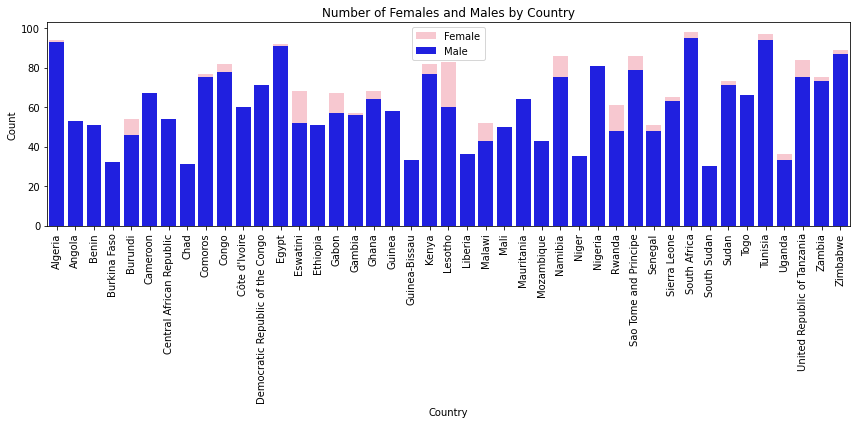

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Female' and 'Male' columns to numeric types
school['Female'] = pd.to_numeric(school['Female'], errors='coerce')
school['Male'] = pd.to_numeric(school['Male'], errors='coerce')

# Group the data by country and calculate the total number of females and males
gender_counts = school.groupby('Country')[['Female', 'Male']].sum().reset_index()

# Plotting the bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Female', data=gender_counts, color='pink', label='Female')
sns.barplot(x='Country', y='Male', data=gender_counts, color='blue', label='Male')
plt.title('Number of Females and Males by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()



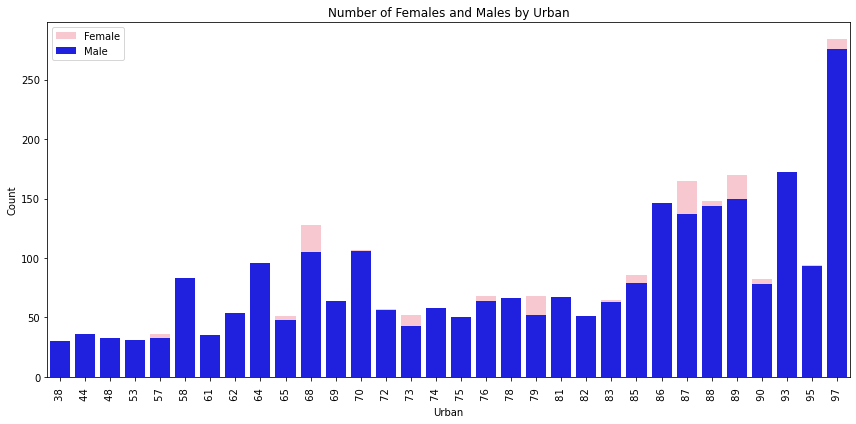

In [60]:


# Convert 'Female' and 'Male' columns to numeric types
school['Female'] = pd.to_numeric(school['Female'], errors='coerce')
school['Male'] = pd.to_numeric(school['Male'], errors='coerce')

# Group the data by Urban and calculate the total number of females and males
gender_counts = school.groupby('Urban')[['Female', 'Male']].sum().reset_index()

# Plotting the bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Urban', y='Female', data=gender_counts, color='pink', label='Female')
sns.barplot(x='Urban', y='Male', data=gender_counts, color='blue', label='Male')
plt.title('Number of Females and Males by Urban')
plt.xlabel('Urban')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


/Users/moureencaroline/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


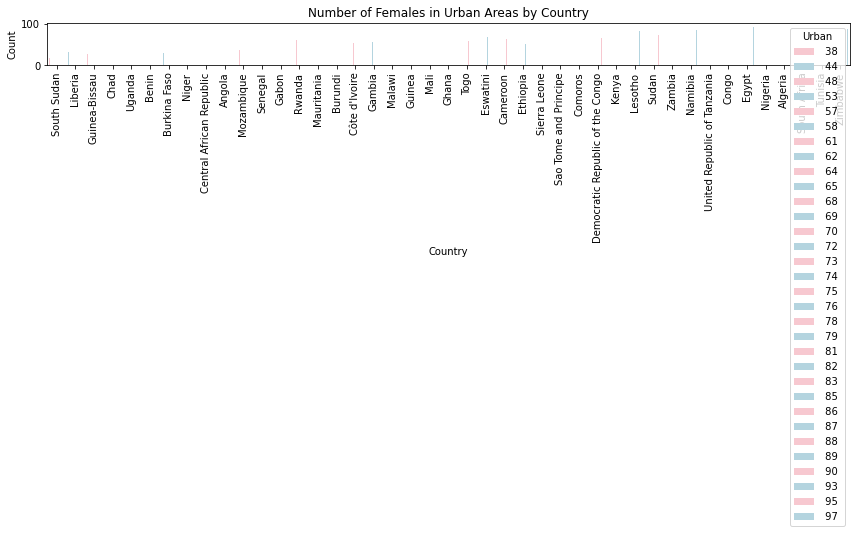

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Female' and 'Male' columns to numeric types
school['Female'] = pd.to_numeric(school['Female'], errors='coerce')
school['Male'] = pd.to_numeric(school['Male'], errors='coerce')

# Group the data by Urban and Country, and calculate the total number of females and males
gender_counts = school.groupby(['Urban', 'Country'])[['Female', 'Male']].sum().reset_index()

# Plotting the bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Female', hue='Urban', data=gender_counts, palette=['pink', 'lightblue'])
plt.title('Number of Females in Urban Areas by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Urban')
plt.tight_layout()
plt.show()


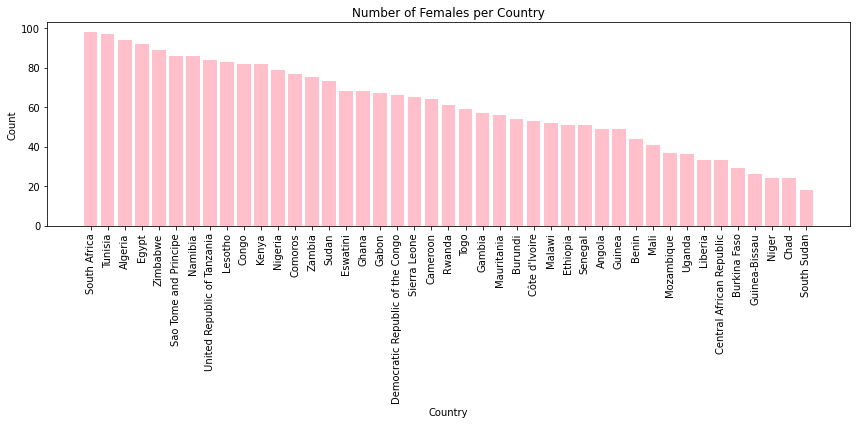

In [62]:
import matplotlib.pyplot as plt

# Filter the dataset for rows where 'Female' column is numeric
numeric_female_data = school[pd.to_numeric(school['Female'], errors='coerce').notnull()]

# Sort the data by number of females in descending order
sorted_data = numeric_female_data.sort_values('Female', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_data['Country'], sorted_data['Female'], color='pink')
plt.title('Number of Females per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


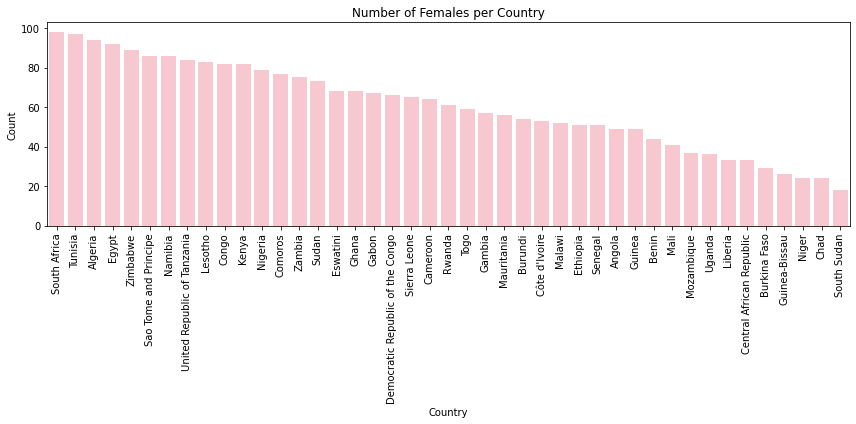

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for rows where 'Female' column is numeric
numeric_female_data = school[pd.to_numeric(school['Female'], errors='coerce').notnull()]

# Sort the data by number of females in descending order
sorted_data = numeric_female_data.sort_values('Female', ascending=False)

# Plotting the bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Female', data=sorted_data, color='pink')
plt.title('Number of Females per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [66]:
school

1,Country,Africa-sub-regions,Male,Female,Urban,Rural
4,Algeria,Northern Africa,93,94,95,91
6,Angola,Southern Africa,53,49,64,21
21,Benin,Western Africa,51,44,58,41
30,Burkina Faso,Western Africa,32,29,58,21
31,Burundi,Central Africa,46,54,70,47
34,Cameroon,Central Africa,67,64,81,49
36,Central African Republic,Central Africa,54,33,62,27
37,Chad,Central Africa,31,24,53,19
41,Comoros,Eastern Africa,75,77,86,71
42,Congo,Central Africa,78,82,90,55


In [67]:
school.to_csv('school_data.csv',index=False)